# Clustering

- What is clustering?
    - Grouping similar data points into groups.
    - Clustering helps discover unknown characteristics of data.

- What clustering algorithms do you know?
    - Linear regression. Not really.
    - Kmeans
    
- What can we do with clustering?  What are the applications?
    - Given heights, weights, ...
    - Given home sales, what do the clusters of similar items represent?
           - Age
           - Price
           - Location
    - Given sepal widths/lengths, petal widths/lengths, what does each cluster represent? Species.
    - Given emails, what does each cluster represent?


In [1]:
import pandas
df = pandas.read_csv('/Users/vphan/Dropbox/datasets/iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
import seaborn
from matplotlib import pyplot
seaborn.relplot(x='SepalLength', y='SepalWidth', data=df)

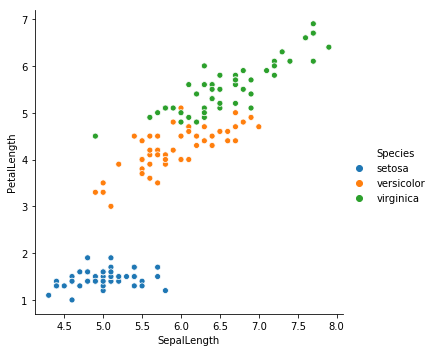

In [3]:
seaborn.relplot(x='SepalLength', y='PetalLength', hue='Species', data=df)

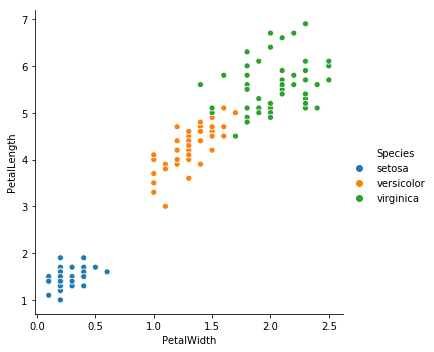

In [4]:
seaborn.relplot(x='PetalWidth', y='PetalLength', hue='Species', data=df)

In [5]:
df.var()


SepalLength    0.685694
SepalWidth     0.189979
PetalLength    3.116278
PetalWidth     0.581006
dtype: float64

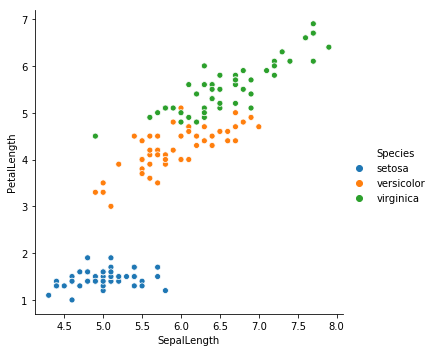

In [6]:
seaborn.relplot(x='SepalLength', y='PetalLength', hue='Species', data=df)

# Kmeans

- We specify k, the number of clusters.
- Kmeans algorithm groups the data into k clusters.  Each cluster contains points that are most similar.  
- Similarity is measured by Euclidean distance.
    - $d(x,y) = \sqrt{ \sum_{i=1}^n (x_i - y_i)^2 }$ 

## Distances

Distance is the "opposite" of similarity.

Similarity is usually normalized to be between 0 and 1.

There are different measures of distances:

A "metric" is mathematical notion of distance.

A metric satisfies three properties:

1. d(x,y) = d(y,x)
2. d(x,y) >= 0
3. d(x,y) <= d(x,z) + d(z,y)




We think in L2 metric: $d(x,y) = \sqrt{ \sum_{i=1}^n (x_i - y_i)^2 }$ 

$L_2 = d(x,y) = \sqrt{ \sum_{i=1}^n (x_i - y_i)^2 }$ 

$L_1 = d(x,y) = \sum_{i=1}^n | x_i - y_i | $ 

$L_p = d(x,y) = (\sum_{i=1}^n (x_i - y_i)^p))^{1 \over p}$ 

In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

In [8]:
# X (features) must be a list columns
X = df[ ['SepalLength', 'PetalLength'] ]

For clustering problems, there's usually no dependent variable (y).  Clustering is about discovering new characteristics, new patterns, new categories.

In [9]:
# Now we do the clustering
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

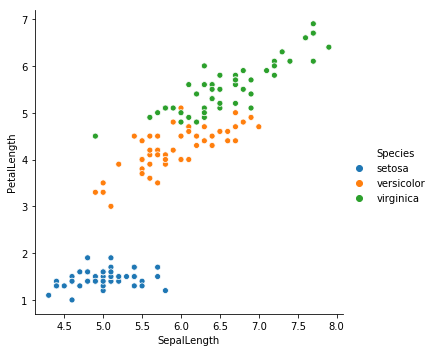

In [10]:
seaborn.relplot(x='SepalLength', y='PetalLength', hue='Species', data=df)

In [11]:
x1=[6.2,5]
x2=[5,2]
model.predict([x2, x1])


array([1, 0], dtype=int32)

In [12]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

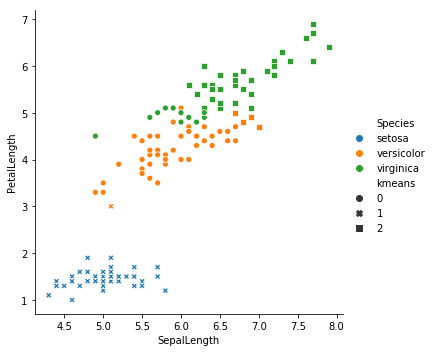

In [13]:
df['kmeans'] = model.labels_    # valid because order of rows is same as order of labels.
seaborn.relplot(x='SepalLength', y='PetalLength', hue='Species', style='kmeans', data=df)


model.predict([[4.0,2.1],  [5.5,2.5], [4,4], [7,7], [6,4.5]])

## How does Kmeans work?

- Input: data, k
- Start with k random data points, representing k singleton clusters.
- Also assign these k points as "centroids" of the clusters.
- For each data point, p, 
    - assign p to the closest centroid.
    - readjust the centroid
- Repeat this loop until the centroids stay fixed.


If cluster C contains, x1, x2, ..., x10, then the centroid of C is:

$ x_c = {\sum_{i=1}^{10} x_i \over 10}$

Visualization is great if we have only two variables as features.  Visualization is intuitive, but not quantitative.

If we have more than two features, we need another method of evaluation.


## How do we evaluate the quality of a clustering 

1. We know the ground truths.  Rare.  Most of the time, we don't know. (If we do, classification is a better approach than clustering).
    - We use something like Rand Index (Rand score) to compare the true clustering and the predicted clustering (e.g. one produced by KMeans).

2. We don't the ground truths.  This is most often the case.

### When we know the ground truth: Rand Index or Rand Score

Given two clusterings (one is the truth; the other is produced by a clustering algorithm):  X = {X1, ..., Xn} and Y = {Y1, ..., Ym}.

$R = { a + b \over {n \choose 2} }$

a - the number of pairs (of data points) that are in the same clusters in X and in Y.

b - the number of paris that are in differnt clusters in X, and in different clusters in Y.

a+b is the number of agreements (in terms of pairs of data points) in X and in Y.

In [14]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score([0, 0, 0, 1, 1], [0, 0, 0, 1, 1])

1.0

X = { {1,2,3},  {4, 5} }

Y = { {1,2,3},  {4, 5} }

Rand score is 1.

In [15]:
adjusted_rand_score([0, 0, 1, 1, 1], [10,10,10,5,5])

0.16666666666666663

X = { {1,2} , {3, 4, 5} }

Y = { {1,2,3}, {4,5} }

a is the size of this set: { (1,2), {4,5} }.  a is 2.

b is the size of this set: { (1,4), (1,5), (2,4), (2,5) }. b is 4.


Rand score is 6 / 10.

(Adjusted) Rand score is 0.17


In [16]:
6/10

0.6

In [17]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [18]:
df.Species.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

In [19]:
adjusted_rand_score(df.Species, model.labels_)

0.6988627672348092

## Feature selection

Let's compare the quality of Kmeans (k=3) using two features (Sepal Width, Sepal Length) versus four features (Sepal Width/Length, Petal Width/Length)

In [24]:
from sklearn.metrics.cluster import adjusted_rand_score

df = pandas.read_csv('/Users/vphan/Dropbox/datasets/iris.csv')


In [21]:
# Evaluate 2 features
X2 = df[ ['SepalWidth', 'SepalLength']]
m2 = KMeans(n_clusters=3)
m2.fit(X2)
print('Using two features:', adjusted_rand_score(df.Species, m2.labels_))

# Evaluate 4 features

X4 = df[ ['SepalWidth', 'SepalLength', 'PetalWidth', 'PetalLength']]
m4 = KMeans(n_clusters=3)
m4.fit(X4)
print('Using four features:', adjusted_rand_score(df.Species, m4.labels_))

Using two features: 0.6006861021484542
Using four features: 0.7302382722834697


## When we don't know the ground truth

We have to quantify the notion of a good clustering.  There are two aspects that we can quantify:  (1) separation between clusters, and (2) tightness / cohesion of each cluster.

We'll look at one measure that incorporates both notions of separation and cohesiveness.  This is the silouhette measure.

Given a data point p, let's suppose p belongs to cluster C1. 

Define a(p) to be the average distance between p and all points in C1.


Define b(p) to be the average distance between p and all points in the cluster that is closest to C1.

Silhoutte(p) = (b(p) - a(p)) / max(b(p), a(p))


The silhouette of a clustering is simply the average silhouette of all points.

In [22]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
print('KMeans with 2 features:', silhouette_score(X2, m2.labels_, metric='euclidean'))
print('KMeans with 4 features:', silhouette_score(X4, m4.labels_, metric='euclidean'))

KMeans with 2 features: 0.4450525692083639
KMeans with 4 features: 0.5528190123564097



In summary, when we have ground truth, we can evaluate a clustering method using measures like Rand Index (adjusted rand index/score is better).  When we do not have ground truth, a measure like silhouette is required.



## Identification of clusters


In [25]:
X4 = df[ ['SepalWidth', 'SepalLength', 'PetalWidth', 'PetalLength']]
m4 = KMeans(n_clusters=3)
m4.fit(X4)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
m4.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [31]:
zeros = [ i for i in range(len(m4.labels_)) if m4.labels_[i]==0 ]

# Other clustering methods

There are many.  We will briefly discuss two: (1) hiearchical clustering, and (2) DBSCAN.



In [36]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN

km = KMeans(n_clusters=3)

In [70]:
hc = AgglomerativeClustering(n_clusters=3, linkage='average')

In [38]:
ds = DBSCAN()

In [71]:
km.fit(X4)
hc.fit(X4)
ds.fit(X4)

print(km)
print(hc)
print(ds)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3, pooling_func=<function mean at 0x10a0b22f0>)
DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)


In [47]:
print(adjusted_rand_score(df.Species, km.labels_))

0.7302382722834697


In [72]:
print(adjusted_rand_score(df.Species, hc.labels_))

0.7591987071071522


In [49]:
print(adjusted_rand_score(df.Species, ds.labels_))

0.5206185241703302


In [50]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [51]:
hc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [52]:
ds.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [54]:
set(ds.labels_)

{-1, 0, 1}

In [61]:
X4.sample()


,SepalWidth,SepalLength,PetalWidth,PetalLength
98,2.5,5.1,1.1,3.0


In [69]:
hc

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x10a0b22f0>)

In [73]:
ds.fit(X4)


DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [74]:
df['dbscan'] = ds.labels_

In [75]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,dbscan
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
5,5.4,3.9,1.7,0.4,setosa,0
6,4.6,3.4,1.4,0.3,setosa,0
7,5.0,3.4,1.5,0.2,setosa,0
8,4.4,2.9,1.4,0.2,setosa,0
9,4.9,3.1,1.5,0.1,setosa,0


In [76]:
df[0:50]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,dbscan
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
5,5.4,3.9,1.7,0.4,setosa,0
6,4.6,3.4,1.4,0.3,setosa,0
7,5.0,3.4,1.5,0.2,setosa,0
8,4.4,2.9,1.4,0.2,setosa,0
9,4.9,3.1,1.5,0.1,setosa,0


In [77]:
df[50:100]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,dbscan
50,7.0,3.2,4.7,1.4,versicolor,1
51,6.4,3.2,4.5,1.5,versicolor,1
52,6.9,3.1,4.9,1.5,versicolor,1
53,5.5,2.3,4.0,1.3,versicolor,1
54,6.5,2.8,4.6,1.5,versicolor,1
55,5.7,2.8,4.5,1.3,versicolor,1
56,6.3,3.3,4.7,1.6,versicolor,1
57,4.9,2.4,3.3,1.0,versicolor,-1
58,6.6,2.9,4.6,1.3,versicolor,1
59,5.2,2.7,3.9,1.4,versicolor,1


In [78]:
df[100:150]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,dbscan
100,6.3,3.3,6.0,2.5,virginica,1
101,5.8,2.7,5.1,1.9,virginica,1
102,7.1,3.0,5.9,2.1,virginica,1
103,6.3,2.9,5.6,1.8,virginica,1
104,6.5,3.0,5.8,2.2,virginica,1
105,7.6,3.0,6.6,2.1,virginica,-1
106,4.9,2.5,4.5,1.7,virginica,-1
107,7.3,2.9,6.3,1.8,virginica,1
108,6.7,2.5,5.8,1.8,virginica,-1
109,7.2,3.6,6.1,2.5,virginica,-1


In [79]:
ds

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [97]:
ds = DBSCAN(eps=0.5)
ds.fit(X4)
print(ds.labels_)
print(adjusted_rand_score(df.Species, ds.labels_))

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
0.5206185241703302
